# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

In [3]:
pd.set_option('display.max_columns', 100)

In [4]:
import sys
# sys.path.append(r'D:\Usuarios\Kitty\Documentos\1-Master\TFM')
sys.path.append(r'D:\Programas\GitHub\TFM')

# Load Data

In [5]:
df = pd.read_csv("Credit_Card_Outliers.csv")

In [6]:
df

,CreditLimit,Gender,EducationLevel,Marriage,Age,RepaymentStatusSep,RepaymentStatusAug,RepaymentStatusJul,RepaymentStatusJun,RepaymentStatusMay,RepaymentStatusApr,BillAmountSep,BillAmountAug,BillAmountJul,BillAmountJun,BillAmountMay,BillAmountApr,PreviousPaymentSep,PreviousPaymentAug,PreviousPaymentJul,PreviousPaymentJun,PreviousPaymentMay,PreviousPaymentApr,Default
0,20000.0,Female,University,Married,24.0,Delay 2 Months,Delay 2 Months,Paid Duly,Paid Duly,NaN,NaN,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,Female,University,Single,26.0,Paid Duly,Delay 2 Months,No Consumption,No Consumption,No Consumption,Delay 2 Months,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,Female,University,Single,34.0,No Consumption,No Consumption,No Consumption,No Consumption,No Consumption,No Consumption,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,Female,University,Married,37.0,No Consumption,No Consumption,No Consumption,No Consumption,No Consumption,No Consumption,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,Male,University,Married,57.0,Paid Duly,No Consumption,Paid Duly,No Consumption,No Consumption,No Consumption,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,2009.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,Male,High School,Married,39.0,No Consumption,No Consumption,No Consumption,No Consumption,No Consumption,No Consumption,22381.5,21200.0,20088.5,88004.0,31237.0,15980.0,8500.0,2009.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,Male,High School,Single,43.0,Paid Duly,Paid Duly,Paid Duly,Paid Duly,No Consumption,No Consumption,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,Male,University,Single,37.0,Delay 2+ Months,Delay 2+ Months,Delay 2 Months,Paid Duly,No Consumption,No Consumption,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,1800.0,4200.0,2000.0,3100.0,1
29998,80000.0,Male,High School,Married,41.0,Delay 1 Month,Paid Duly,No Consumption,No Consumption,No Consumption,Paid Duly,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,2100.0,3409.0,1178.0,1926.0,1500.0,1804.0,1


# Parameters

In [7]:
target = "Default"

# Rellenamos NaN con la moda

In [8]:
# Identificar columnas categóricas
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Rellenar los NaN de las columnas categóricas con la moda
for col in categorical_columns:
    moda = df[col].mode()[0]  # Obtenemos la moda (primer valor si hay múltiples)
    df[col].fillna(moda, inplace=True)

# Mostrar el DataFrame resultante
print("Dataset después de rellenar los NaN con la moda:")
df


Dataset después de rellenar los NaN con la moda:


C:\Users\kitt_.DESKTOP-FP2KS5Q.000\AppData\Local\Temp\ipykernel_19156\2455475951.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(moda, inplace=True)


,CreditLimit,Gender,EducationLevel,Marriage,Age,RepaymentStatusSep,RepaymentStatusAug,RepaymentStatusJul,RepaymentStatusJun,RepaymentStatusMay,RepaymentStatusApr,BillAmountSep,BillAmountAug,BillAmountJul,BillAmountJun,BillAmountMay,BillAmountApr,PreviousPaymentSep,PreviousPaymentAug,PreviousPaymentJul,PreviousPaymentJun,PreviousPaymentMay,PreviousPaymentApr,Default
0,20000.0,Female,University,Married,24.0,Delay 2 Months,Delay 2 Months,Paid Duly,Paid Duly,No Consumption,No Consumption,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,Female,University,Single,26.0,Paid Duly,Delay 2 Months,No Consumption,No Consumption,No Consumption,Delay 2 Months,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,Female,University,Single,34.0,No Consumption,No Consumption,No Consumption,No Consumption,No Consumption,No Consumption,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,Female,University,Married,37.0,No Consumption,No Consumption,No Consumption,No Consumption,No Consumption,No Consumption,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,Male,University,Married,57.0,Paid Duly,No Consumption,Paid Duly,No Consumption,No Consumption,No Consumption,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,2009.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,Male,High School,Married,39.0,No Consumption,No Consumption,No Consumption,No Consumption,No Consumption,No Consumption,22381.5,21200.0,20088.5,88004.0,31237.0,15980.0,8500.0,2009.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,Male,High School,Single,43.0,Paid Duly,Paid Duly,Paid Duly,Paid Duly,No Consumption,No Consumption,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,Male,University,Single,37.0,Delay 2+ Months,Delay 2+ Months,Delay 2 Months,Paid Duly,No Consumption,No Consumption,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,1800.0,4200.0,2000.0,3100.0,1
29998,80000.0,Male,High School,Married,41.0,Delay 1 Month,Paid Duly,No Consumption,No Consumption,No Consumption,Paid Duly,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,2100.0,3409.0,1178.0,1926.0,1500.0,1804.0,1


# One-Hot Encoder

In [9]:
# Identificar columnas categóricas
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Realizar One-Hot Encoding para todas las columnas categóricas
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=False)

# Mostrar el DataFrame resultante
print("Dataset después del One-Hot Encoding:")
df_encoded

Dataset después del One-Hot Encoding:


,CreditLimit,Age,BillAmountSep,BillAmountAug,BillAmountJul,BillAmountJun,BillAmountMay,BillAmountApr,PreviousPaymentSep,PreviousPaymentAug,PreviousPaymentJul,PreviousPaymentJun,PreviousPaymentMay,PreviousPaymentApr,Default,Gender_Female,Gender_Male,EducationLevel_Graduate School,EducationLevel_High School,EducationLevel_Others,EducationLevel_University,EducationLevel_Unknown,Marriage_Married,Marriage_Others,Marriage_Single,Marriage_Unknown,RepaymentStatusSep_Delay 1 Month,RepaymentStatusSep_Delay 2 Months,RepaymentStatusSep_Delay 2+ Months,RepaymentStatusSep_No Consumption,RepaymentStatusSep_Paid Duly,RepaymentStatusAug_Delay 1 Month,RepaymentStatusAug_Delay 2 Months,RepaymentStatusAug_Delay 2+ Months,RepaymentStatusAug_No Consumption,RepaymentStatusAug_Paid Duly,RepaymentStatusJul_Delay 1 Month,RepaymentStatusJul_Delay 2 Months,RepaymentStatusJul_Delay 2+ Months,RepaymentStatusJul_No Consumption,RepaymentStatusJul_Paid Duly,RepaymentStatusJun_Delay 1 Month,RepaymentStatusJun_Delay 2 Months,RepaymentStatusJun_Delay 2+ Months,RepaymentStatusJun_No Consumption,RepaymentStatusJun_Paid Duly,RepaymentStatusMay_Delay 2 Months,RepaymentStatusMay_Delay 2+ Months,RepaymentStatusMay_No Consumption,RepaymentStatusMay_Paid Duly,RepaymentStatusApr_Delay 2 Months,RepaymentStatusApr_Delay 2+ Months,RepaymentStatusApr_No Consumption,RepaymentStatusApr_Paid Duly
0,20000.0,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False
1,120000.0,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False
2,90000.0,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False
3,50000.0,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,True,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False
4,50000.0,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,2009.0,10000.0,9000.0,689.0,679.0,0,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,39.0,22381.5,21200.0,20088.5,88004.0,31237.0,15980.0,8500.0,2009.0,5003.0,3047.0,5000.0,1000.0,0,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False
29996,150000.0,43.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False
29997,30000.0,37.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,1800.0,4200.0,2000.0,3100.0,1,False,True,False,False,False,True,Fals

In [10]:
vars_numericas = df_encoded.select_dtypes(include=['float', 'int']).columns

# Scale

In [11]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

# 1. Cargar el dataset
X = df_encoded[[elem for elem in df_encoded.columns if elem != target]]
y = pd.Series(df_encoded[target], name=target)

# 2. Escalar los datos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled[-1])
print("\n",X.shape)

[0.07843137 0.64102564 0.35605617 0.52680827 0.53516805 0.51385149
 0.50922357 0.4063114  0.1886861  0.16001422 0.13398295 0.10434057
 0.10309278 0.10186411 0.         1.         0.         0.
 0.         1.         0.         1.         0.         0.
 0.         0.         0.         0.         1.         0.
 0.         0.         0.         1.         0.         0.
 0.         0.         1.         0.         0.         0.
 0.         1.         0.         0.         0.         1.
 0.         0.         0.         1.         0.        ]

 (30000, 53)


# SMOTE

In [12]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y prueba
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Revisar la proporción inicial de clases
print("Distribución original de y_train:")
print(y_train.value_counts())

# Inicializar SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE para generar un conjunto balanceado
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Revisar la nueva distribución de clases
print("\nDistribución después de SMOTE:")
print(y_train_smote.value_counts())

Distribución original de y_train:
Default
0    18691
1     5309
Name: count, dtype: int64

Distribución después de SMOTE:
Default
0    18691
1    18691
Name: count, dtype: int64


# TRAIN

In [13]:
%%time
# 3. Configurar validación cruzada k-fold
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# 4. Inicializar modelos
models = {
    "Regresión Logística": LogisticRegression(max_iter=1000, random_state=42),
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5, n_jobs=-1),
    "Random Forest": RandomForestClassifier(random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# 5. Configurar los hiperparámetros para cada modelo
param_grids = {
    "Regresión Logística": {
        "C": [0.1, 1, 10],
        "solver": ["lbfgs", "liblinear"],
        "penalty": ["l2"]
    },
    "Árbol de Decisión": {
        "criterion": ["gini", "entropy"],
        "max_depth": [3, 4],
        "min_samples_split": [50, 500]
    },
    "Naive Bayes": {
        "var_smoothing": np.logspace(0, -9, num=5)
    },
    "K-Nearest Neighbors": {
        "n_neighbors": [3, 5, 7],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan"]
    },
    "Random Forest": {
        "n_estimators": [50, 100],
        "max_depth": [3, 5],
        "min_samples_split": [50, 500]
    },
    "Gradient Boosting": {
        "n_estimators": [50, 100],
        "learning_rate": [0.01, 0.1],
        "max_depth": [3, 5]
    }
}

# 6. Diccionario para almacenar los mejores modelos y resultados
best_models = {}
grid_results = []

# 7. Iterar sobre cada modelo y realizar GridSearchCV
for model_name, model in models.items():
    grid = GridSearchCV(
        estimator=model,
        param_grid=param_grids[model_name],
        cv=kfold,
        scoring="accuracy",
        n_jobs=-2
    )
    grid.fit(X_train_smote, y_train_smote)
    best_models[model_name] = grid.best_estimator_
    grid_results.append({
        "Model": model_name,
        "Best Params": grid.best_params_,
        "Best Accuracy": grid.best_score_
    })

# Convertir resultados de hiperparámetros en un DataFrame
grid_results_df = pd.DataFrame(grid_results)
grid_results_df.sort_values(by="Best Accuracy", ascending=False, inplace=True)

# 8. Evaluar los mejores modelos con k-fold
evaluation_summary = []

for model_name, best_model in best_models.items():
    accuracy = cross_val_score(best_model, X_train_smote, y_train_smote, cv=kfold, scoring="accuracy").mean()
    precision = cross_val_score(best_model, X_train_smote, y_train_smote, cv=kfold, scoring="precision_weighted").mean()
    recall = cross_val_score(best_model, X_train_smote, y_train_smote, cv=kfold, scoring="recall_weighted").mean()
    f1 = cross_val_score(best_model, X_train_smote, y_train_smote, cv=kfold, scoring="f1_weighted").mean()
    roc_auc = cross_val_score(best_model, X_train_smote, y_train_smote, cv=kfold, scoring="roc_auc").mean()
    
    evaluation_summary.append({
        "Model": model_name,
        "Mean Accuracy": accuracy,
        "Mean Precision": precision,
        "Mean Recall": recall,
        "Mean F1-Score": f1,
        "Mean ROC - AUC": roc_auc
    })

# Convertir resultados de evaluación en un DataFrame
evaluation_df = pd.DataFrame(evaluation_summary)
evaluation_df.sort_values(by="Mean Accuracy", ascending=False, inplace=True)

# 9. Mostrar resultados finales
print("Resultados de búsqueda de hiperparámetros:")
print(grid_results_df)

print("\nDesempeño de los modelos optimizados:")
print(evaluation_df)

Resultados de búsqueda de hiperparámetros:
                 Model                                        Best Params  \
5    Gradient Boosting  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...   
3  K-Nearest Neighbors  {'metric': 'manhattan', 'n_neighbors': 3, 'wei...   
4        Random Forest  {'max_depth': 5, 'min_samples_split': 50, 'n_e...   
0  Regresión Logística  {'C': 0.1, 'penalty': 'l2', 'solver': 'libline...   
2          Naive Bayes          {'var_smoothing': 3.1622776601683795e-05}   
1    Árbol de Decisión  {'criterion': 'gini', 'max_depth': 4, 'min_sam...   

   Best Accuracy  
5       0.836552  
3       0.830855  
4       0.726124  
0       0.708603  
2       0.694264  
1       0.691616  

Desempeño de los modelos optimizados:
                 Model  Mean Accuracy  Mean Precision  Mean Recall  \
5    Gradient Boosting       0.836552        0.839883     0.836552   
3  K-Nearest Neighbors       0.830935        0.849596     0.830935   
4        Random Forest       0.7261

In [14]:
# Guardamos resultados
grid_results_df.to_excel("grid_results_df.xlsx", index=False)
evaluation_df.to_excel("evaluation_df.xlsx", index=False)

### Guardamos los modelos

In [18]:
import joblib

# Guardar los mejores modelos en archivos locales
for model_name, best_model in best_models.items():
    # Definir el nombre del archivo para cada modelo
    filename = f"{model_name.replace(' ', '_')}_best_model.joblib"
    # Guardar el modelo
    joblib.dump(best_model, filename)
    print(f"Modelo {model_name} guardado como {filename}")

Modelo Regresión Logística guardado como Regresión_Logística_best_model.joblib
Modelo Árbol de Decisión guardado como Árbol_de_Decisión_best_model.joblib
Modelo Naive Bayes guardado como Naive_Bayes_best_model.joblib
Modelo K-Nearest Neighbors guardado como K-Nearest_Neighbors_best_model.joblib
Modelo Random Forest guardado como Random_Forest_best_model.joblib


### Cargamos los modelos

In [13]:
import joblib

# Cargar los modelos desde los archivos y almacenarlos en best_models con los mismos nombres
best_models = {}

# Lista de los nombres de los modelos tal como estaban antes
model_names = [
    "Regresión Logística", 
    "Árbol de Decisión", 
    "Naive Bayes", 
    "K-Nearest Neighbors", 
    "Random Forest", 
    "Gradient Boosting"
]

# Iterar sobre los nombres de los modelos y cargar los archivos correspondientes
for model_name in model_names:
    # Definir el nombre del archivo de cada modelo
    filename = f"{model_name.replace(' ', '_')}_best_model.joblib"
    # Cargar el modelo y guardarlo en el diccionario best_models con el nombre original
    best_models[model_name] = joblib.load(filename)
    print(f"Modelo {model_name} cargado desde {filename}")

Modelo Regresión Logística cargado desde Regresión_Logística_best_model.joblib
Modelo Árbol de Decisión cargado desde Árbol_de_Decisión_best_model.joblib
Modelo Naive Bayes cargado desde Naive_Bayes_best_model.joblib
Modelo K-Nearest Neighbors cargado desde K-Nearest_Neighbors_best_model.joblib
Modelo Random Forest cargado desde Random_Forest_best_model.joblib
Modelo Gradient Boosting cargado desde Gradient_Boosting_best_model.joblib


# Regresión Logística

In [20]:
# Importar bibliotecas necesarias
import numpy as np
import pandas as pd

# Extraer el modelo de Regresión Logística
logistic_model = best_models["Regresión Logística"]

# Obtener los coeficientes y el intercepto
coefficients = logistic_model.coef_[0]
intercept = logistic_model.intercept_[0]

# Crear un DataFrame para los coeficientes
feature_names = X.columns
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients,
    "Absolute Coefficient": np.abs(coefficients)
})

# Ordenar los coeficientes por valor absoluto en orden descendente
coef_df_sorted = coef_df.sort_values(by="Coefficient", ascending=False)

# Generar la ecuación de la regresión logística ordenada
sorted_features = coef_df_sorted["Feature"]
sorted_coefficients = coef_df_sorted["Coefficient"]

# Crear la ecuación ordenada
equation = " + ".join(
    [f"{coef:.4f}*{feature}" for coef, feature in zip(sorted_coefficients, sorted_features)]
)
equation = f"logit(p) = {intercept:.4f} + {equation}"

# Mostrar la ecuación
print("Ecuación de la Regresión Logística (ordenada por relevancia):")
print(equation)

# Mostrar los coeficientes ordenados
print("\nCoeficientes de la Regresión Logística ordenados por relevancia:")
print(coef_df_sorted.head(20))


Ecuación de la Regresión Logística (ordenada por relevancia):
logit(p) = 0.2446 + 1.2171*RepaymentStatusSep_Delay 2 Months + 0.7396*RepaymentStatusSep_Delay 2+ Months + 0.4712*EducationLevel_University + 0.4600*EducationLevel_Graduate School + 0.4170*Marriage_Married + 0.3848*RepaymentStatusJul_Delay 2 Months + 0.3482*RepaymentStatusMay_Delay 2 Months + 0.3129*EducationLevel_High School + 0.3060*RepaymentStatusApr_Delay 2+ Months + 0.2864*RepaymentStatusAug_Delay 2 Months + 0.2840*RepaymentStatusJun_Delay 2 Months + 0.2488*Marriage_Single + 0.2319*BillAmountApr + 0.1970*BillAmountJun + 0.1919*Gender_Male + 0.1914*RepaymentStatusApr_Delay 2 Months + 0.1664*Marriage_Others + 0.1564*RepaymentStatusAug_No Consumption + 0.1411*RepaymentStatusAug_Delay 2+ Months + 0.0919*Age + 0.0668*RepaymentStatusMay_Paid Duly + 0.0527*Gender_Female + 0.0510*RepaymentStatusJul_Delay 2+ Months + 0.0443*RepaymentStatusJun_Delay 1 Month + 0.0225*RepaymentStatusJun_No Consumption + 0.0130*RepaymentStatusMay_No

In [20]:
import math
from math import exp
exp(0.7396)

print("f_0",((1-0.3)**2)/(2*(0.3**2)))
print("f_1",((1-0.7)**2)/(2*(0.3**2)))
print(0.298-0.03)

f_0 2.722222222222222
f_1 0.5000000000000001
0.268


# Árbol de Decisión

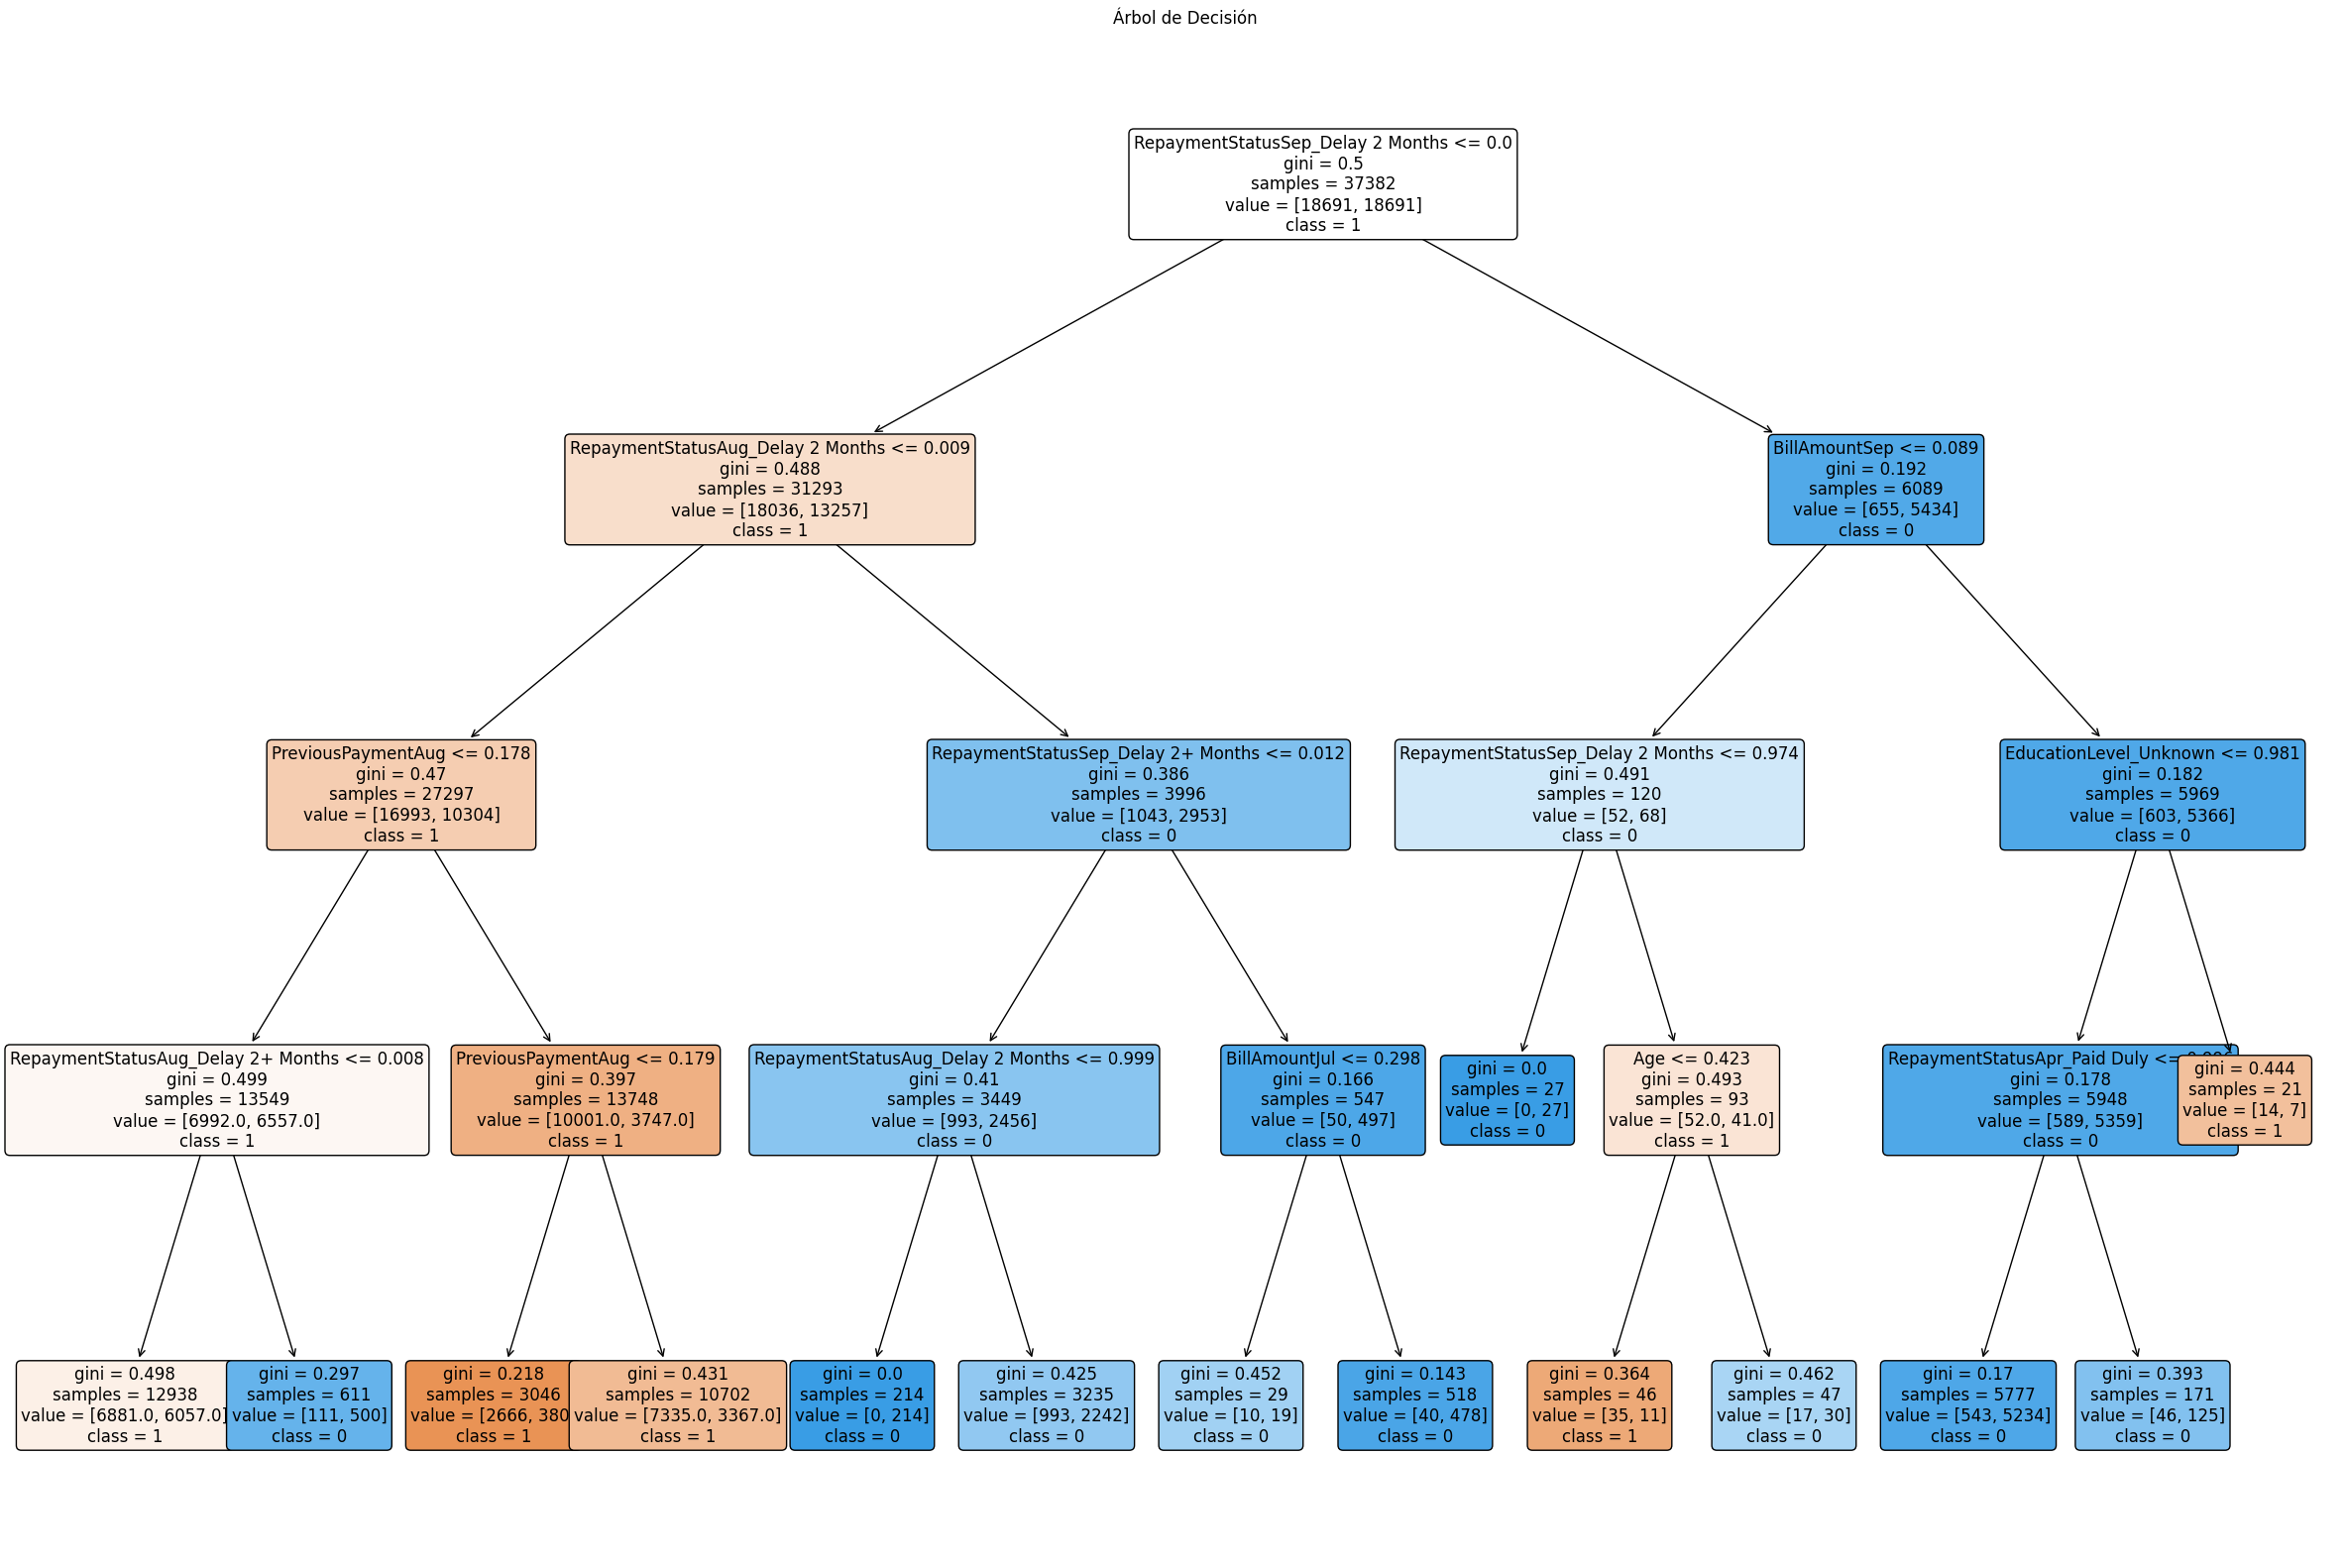

In [20]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Árbol de Decisión
decision_tree_model = best_models["Árbol de Decisión"]

# Crear la gráfica
plt.figure(figsize=(30, 20))
plot_tree(
    decision_tree_model,
    feature_names=X.columns,  # Nombres de las características (si es un DataFrame)
    class_names=[str(cls) for cls in y.unique()],  # Nombres de las clases
    filled=True,  # Colorear nodos según la clase predominante
    rounded=True,  # Bordes redondeados
    fontsize=12  # Tamaño de la fuente
)
plt.title("Árbol de Decisión")
plt.show()

In [24]:
decision_tree_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 50,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [33]:
decision_tree_model.feature_importances_

array([0.        , 0.00175395, 0.00615121, 0.        , 0.00093126,
       0.        , 0.        , 0.        , 0.        , 0.18487283,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00319279, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.53351422, 0.00863221, 0.        , 0.        ,
       0.        , 0.22466578, 0.03387696, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00240879])

In [35]:
feature_names = list(df_encoded.columns)
feature_names.remove("Default")
feature_names;

In [36]:
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': decision_tree_model.feature_importances_
})

# Ordenar por importancia
importance_df.sort_values(by='Importance', ascending=False)

,Feature,Importance
26,RepaymentStatusSep_Delay 2 Months,0.533514
31,RepaymentStatusAug_Delay 2 Months,0.224666
9,PreviousPaymentAug,0.184873
32,RepaymentStatusAug_Delay 2+ Months,0.033877
27,RepaymentStatusSep_Delay 2+ Months,0.008632
2,BillAmountSep,0.006151
20,EducationLevel_Unknown,0.003193
52,RepaymentStatusApr_Paid Duly,0.002409
1,Age,0.001754
4,BillAmountJul,0.000931


# Naive Bayes

In [14]:
# Extraer el modelo Naive Bayes
nb_model = best_models["Naive Bayes"]

# Calcular probabilidades para el conjunto de prueba
class_probabilities = nb_model.predict_proba(X_val)
predictions = nb_model.predict(X_val)

# Crear un DataFrame con las probabilidades y las predicciones
prob_df = pd.DataFrame(class_probabilities, columns=[f"P(Class {cls})" for cls in nb_model.classes_])
prob_df["Prediction"] = predictions
prob_df["Actual"] = y_val.values

print("Probabilidades calculadas por Naive Bayes para las primeras observaciones:")
print(prob_df.head(20))


Probabilidades calculadas por Naive Bayes para las primeras observaciones:
      P(Class 0)    P(Class 1)  Prediction  Actual
0   9.990551e-01  9.448937e-04           0       0
1   9.975619e-01  2.438088e-03           0       0
2   9.973586e-01  2.641408e-03           0       0
3   1.000000e+00  2.379474e-08           0       1
4   1.000000e+00  3.777661e-08           0       0
5   1.574044e-01  8.425956e-01           1       0
6   9.999929e-01  7.126601e-06           0       0
7   1.000000e+00  1.796212e-08           0       0
8   9.999993e-01  7.318464e-07           0       0
9   9.953422e-01  4.657784e-03           0       0
10  3.464782e-02  9.653522e-01           1       0
11  9.978475e-01  2.152459e-03           0       0
12  9.971728e-01  2.827241e-03           0       1
13  1.000000e+00  8.408186e-09           0       0
14  9.994629e-01  5.371328e-04           0       0
15  1.397976e-14  1.000000e+00           1       0
16  9.999997e-01  3.486278e-07           0       0
17  9.9

In [18]:
np.logspace(0, -9, num=5)

array([1.00000000e+00, 5.62341325e-03, 3.16227766e-05, 1.77827941e-07,
       1.00000000e-09])

### Medias y varianzas para la clase 0

In [15]:
# Asegúrate de que nb_model es de tipo GaussianNB
from sklearn.naive_bayes import GaussianNB

# Extraer las estadísticas de la clase 0
if isinstance(nb_model, GaussianNB):
    class_label = 0  # Cambia esto si la etiqueta de tu clase es diferente
    class_index = list(nb_model.classes_).index(class_label)  # Índice de la clase 1
    
    # Medias y varianzas de la clase 1
    means_class_0 = nb_model.theta_[class_index]
    variances_class_0 = nb_model.var_[class_index]
    
    # Crear un DataFrame con las estadísticas para la clase 10
    stats_class_0_df = pd.DataFrame({
        "Feature": X.columns,
        "Mean": means_class_0,
        "Variance": variances_class_0
    })
    
    print(f"Medias y varianzas para la clase {class_label}:")
    print(stats_class_0_df)
else:
    print("El modelo no es de tipo GaussianNB.")


Medias y varianzas para la clase 0:
                               Feature      Mean  Variance
0                          CreditLimit  0.324338  0.061510
1                                  Age  0.361973  0.049099
2                        BillAmountSep  0.275552  0.046547
3                        BillAmountAug  0.452431  0.027049
4                        BillAmountJul  0.440302  0.028004
5                        BillAmountJun  0.464540  0.024642
6                        BillAmountMay  0.464988  0.023954
7                        BillAmountApr  0.450372  0.024848
8                   PreviousPaymentSep  0.259853  0.056172
9                   PreviousPaymentAug  0.242679  0.052087
10                  PreviousPaymentJul  0.224813  0.052461
11                  PreviousPaymentJun  0.209483  0.047363
12                  PreviousPaymentMay  0.207817  0.046738
13                  PreviousPaymentApr  0.201826  0.045583
14                       Gender_Female  0.616179  0.236510
15                  

### Medias y varianzas para la clase 1

In [16]:
# Asegúrate de que nb_model es de tipo GaussianNB
from sklearn.naive_bayes import GaussianNB

# Extraer las estadísticas de la clase 1
if isinstance(nb_model, GaussianNB):
    class_label = 1  # Cambia esto si la etiqueta de tu clase es diferente
    class_index = list(nb_model.classes_).index(class_label)  # Índice de la clase 1
    
    # Medias y varianzas de la clase 1
    means_class_1 = nb_model.theta_[class_index]
    variances_class_1 = nb_model.var_[class_index]
    
    # Crear un DataFrame con las estadísticas para la clase 1
    stats_class_1_df = pd.DataFrame({
        "Feature": X.columns,
        "Mean": means_class_1,
        "Variance": variances_class_1
    })
    
    print(f"Medias y varianzas para la clase {class_label}:")
    print(stats_class_1_df)
else:
    print("El modelo no es de tipo GaussianNB.")


Medias y varianzas para la clase 1:
                               Feature      Mean  Variance
0                          CreditLimit  0.218785  0.039692
1                                  Age  0.361259  0.048539
2                        BillAmountSep  0.258935  0.035463
3                        BillAmountAug  0.441417  0.020024
4                        BillAmountJul  0.430795  0.020970
5                        BillAmountJun  0.459459  0.019265
6                        BillAmountMay  0.460687  0.018595
7                        BillAmountApr  0.450095  0.019867
8                   PreviousPaymentSep  0.183750  0.036415
9                   PreviousPaymentAug  0.179761  0.035663
10                  PreviousPaymentJul  0.162240  0.032944
11                  PreviousPaymentJun  0.157578  0.032162
12                  PreviousPaymentMay  0.159580  0.032888
13                  PreviousPaymentApr  0.153068  0.030971
14                       Gender_Female  0.568328  0.242429
15                  

### Valores de las probabilidades a priori

In [17]:
# Obtener las probabilidades a priori del modelo entrenado
pi_values = nb_model.class_prior_

pi_0 = pi_values[0]  # Para la clase 0
pi_1 = pi_values[1]  # Para la clase 1

print(f"pi_0 = {pi_0}")
print(f"pi_1 = {pi_1}")


pi_0 = 0.5
pi_1 = 0.5


# KNN

Ejemplo seleccionado (objetivo):
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   0.040404   0.431034   0.147882   0.090952   0.086345   0.162634   

   Feature_7  Feature_8  Feature_9  Feature_10  Feature_11  Feature_12  ...  \
0    0.08394   0.263103   0.029832         0.0    0.003875    0.003736  ...   

   Feature_75  Feature_76  Feature_77  Feature_78  Feature_79  Feature_80  \
0         0.0         0.0         0.0         0.0         0.0         0.0   

   Feature_81  Feature_82  Feature_83  Feature_84  Target  Distance  
0         0.0         0.0         1.0         0.0       0         0  

[1 rows x 86 columns]

Vecinos más cercanos:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   0.090909   0.310345   0.150528   0.070891   0.088848   0.164179   
1   0.020202   0.224138   0.146864   0.066220   0.086773   0.160138   
2   0.010101   0.224138   0.158851   0.074423   0.087428   0.176821   

   Feature_7  Feature_8  Feature_9  Fea

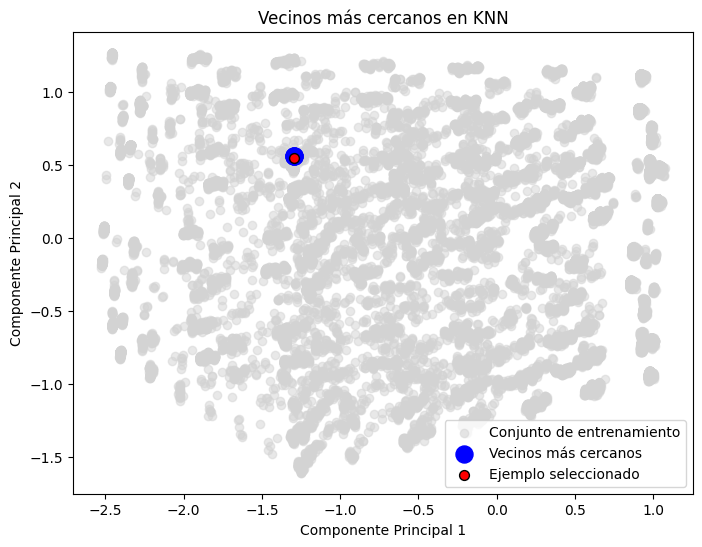

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Extraer el modelo KNN
knn_model = best_models["K-Nearest Neighbors"]

# Seleccionar una muestra del conjunto de validación (X_val como numpy array)
sample_index = 0  # Cambiar este índice para analizar diferentes ejemplos
sample = X_val[sample_index].reshape(1, -1)  # Asegurarse de que tenga forma (1, n_features)

# Obtener los vecinos más cercanos
distances, indices = knn_model.kneighbors(sample)

# Crear un DataFrame con la información de los vecinos (X_train es numpy array)
neighbors_df = pd.DataFrame(
    X_train[indices[0]],  # Recuperar las características de los vecinos
    columns=[f"Feature_{i+1}" for i in range(X_train.shape[1])]  # Crear nombres genéricos para las columnas
)
neighbors_df["Target"] = np.array(y_train)[indices[0]]  # Convertir explícitamente y_train a numpy array
neighbors_df["Distance"] = distances[0]  # Agregar las distancias

# Crear información del ejemplo seleccionado
sample_info = pd.DataFrame(sample, columns=[f"Feature_{i+1}" for i in range(sample.shape[1])])
sample_info["Target"] = np.array(y_val)[sample_index]  # Convertir y_val explícitamente a numpy array
sample_info["Distance"] = 0  # La distancia consigo mismo es 0

# Mostrar información del ejemplo y sus vecinos
print("Ejemplo seleccionado (objetivo):")
print(sample_info)

print("\nVecinos más cercanos:")
print(neighbors_df.sort_values(by="Distance"))

# Visualización (opcional) usando PCA
pca = PCA(n_components=2)

# Reducir dimensiones para graficar
X_train_pca = pca.fit_transform(X_train)  # Reducir X_train a 2D
sample_pca = pca.transform(sample)  # Reducir la muestra a 2D
neighbors_pca = pca.transform(X_train[indices[0]])  # Reducir vecinos a 2D

plt.figure(figsize=(8, 6))

# Graficar todo el conjunto de entrenamiento reducido
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c="lightgray", alpha=0.5, label="Conjunto de entrenamiento")

# Graficar los vecinos más cercanos
plt.scatter(neighbors_pca[:, 0], neighbors_pca[:, 1], c="blue", label="Vecinos más cercanos", s=150)

# Graficar la muestra objetivo
plt.scatter(sample_pca[:, 0], sample_pca[:, 1], c="red", label="Ejemplo seleccionado", s=50, edgecolor="black")  # Reducir el tamaño del punto

plt.title("Vecinos más cercanos en KNN")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.show()


# Random Forest

Predicción: [[0.55871414 0.44128586]]
Bias (valor base): [[0.5006158 0.4993842]]


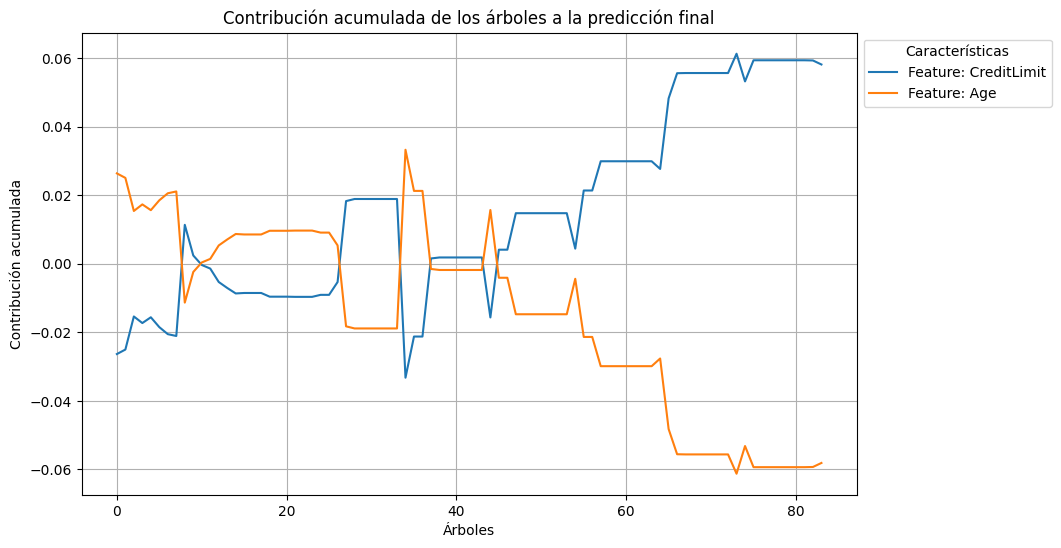

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Asumimos que ya tienes el mejor modelo de Random Forest entrenado y X_val, y_val
# best_models["Random Forest"] es tu mejor modelo entrenado y X_val es tu conjunto de validación

# Usamos los nombres de las características directamente desde X.columns
feature_names = X.columns

# Seleccionamos un ejemplo del conjunto de validación (cambia el índice si es necesario)
example_index = 0  # Puedes cambiar el índice para seleccionar un ejemplo diferente
example = X_val[example_index].reshape(1, -1)  # Asegúrate de tomar un ejemplo de tu conjunto de validación

# Explicar la predicción utilizando TreeInterpreter
prediction, bias, contributions = ti.predict(best_models["Random Forest"], example)

# Mostrar los resultados
print(f"Predicción: {prediction}")
print(f"Bias (valor base): {bias}")  # El sesgo o bias es el valor de la predicción antes de considerar los árboles

# Contribuciones de cada árbol (en cada árbol individualmente)
tree_contribs = [contrib for contrib in contributions[0]]

# Crear un gráfico de la contribución acumulada de los árboles
cumulative_contrib = np.cumsum(tree_contribs, axis=0)  # Sumar las contribuciones de cada árbol de forma acumulativa

# Crear una figura
plt.figure(figsize=(10, 6))

# Graficar la contribución acumulada de los árboles para cada característica
for i in range(cumulative_contrib.shape[1]):  # Recorrer todas las características
    plt.plot(cumulative_contrib[:, i], label=f'Feature: {feature_names[i]}')

# Etiquetas y título
plt.title("Contribución acumulada de los árboles a la predicción final")
plt.xlabel("Árboles")
plt.ylabel("Contribución acumulada")
plt.legend(title="Características", loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

# Mostrar el gráfico
plt.show()

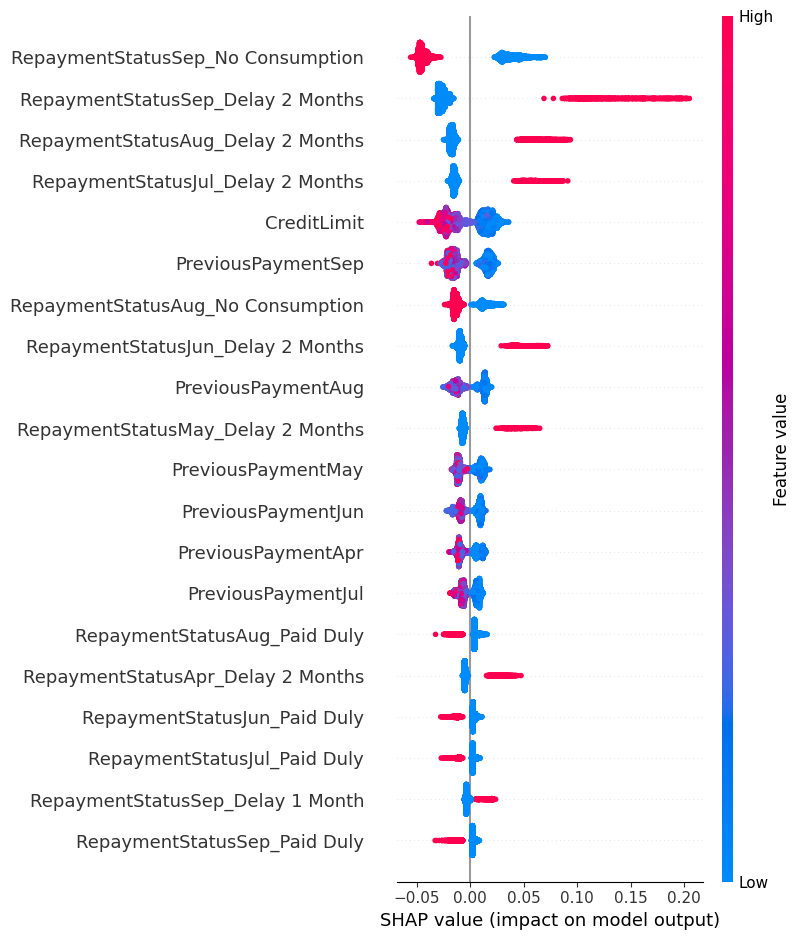

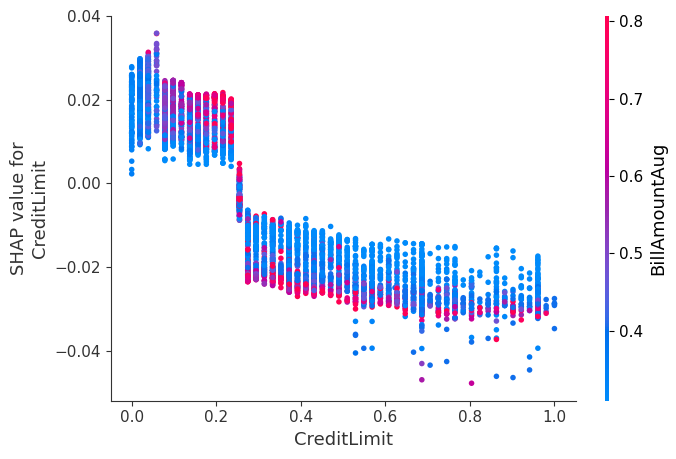

In [74]:
import shap
import matplotlib.pyplot as plt

# Asumimos que el mejor modelo de Random Forest es 'best_models["Random Forest"]'
# Y que tienes X_val, y_val como tus datos de validación

# Creamos un explicador SHAP para Random Forest
explainer = shap.TreeExplainer(best_models["Random Forest"])

# Calculamos los valores SHAP para el conjunto de validación
shap_values = explainer.shap_values(X_val)

shap_values = np.array([[col[1] for col in elem] for elem in shap_values])

# Resumen de los valores SHAP (gráfico resumen)
shap.summary_plot(shap_values, pd.DataFrame(X_val,columns=X.columns))  # 1 es para la clase positiva, ajusta si tienes más de 2 clases

# Gráfico de dispersión para un ejemplo específico
shap.initjs()  # Para inicializar visualizaciones interactivas

# Seleccionamos un ejemplo (puedes cambiar el índice)
example_index = 0
shap.force_plot(explainer.expected_value[1], shap_values[example_index], X_val[example_index])

# Gráfico de dependencia para una característica
shap.dependence_plot("CreditLimit", shap_values, pd.DataFrame(X_val,columns=X.columns))  # Ajusta el nombre de la característica

# Gradient Boosting

In [14]:
boosting_model = best_models['Gradient Boosting']
boosting_model

GradientBoostingClassifier(max_depth=5, random_state=42)

In [15]:
boosting_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [42]:
feature_names = X.columns
feature_names;

In [45]:
df_train = pd.DataFrame(X_train, columns=feature_names)

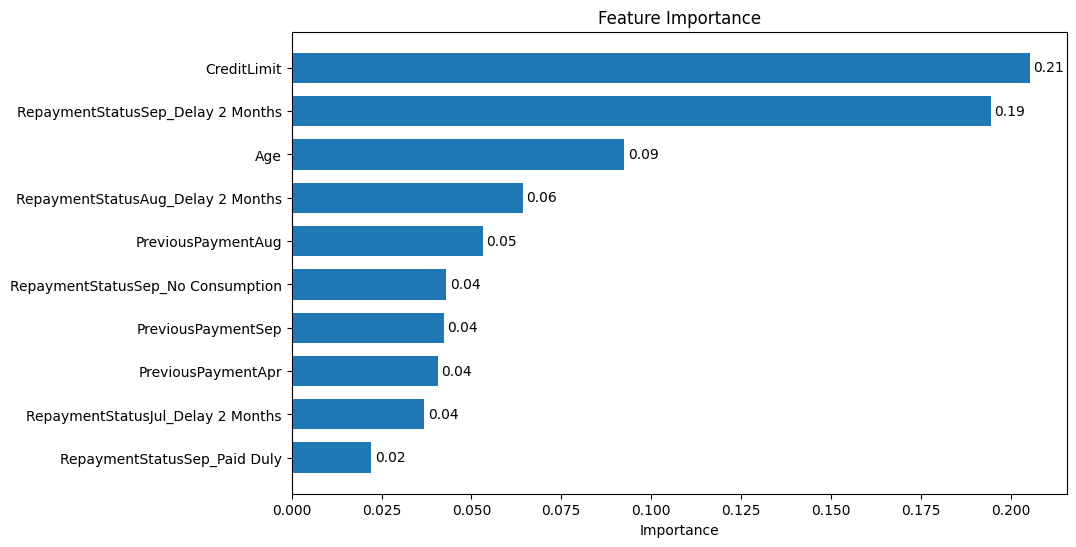

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Obtener importancia de características
feature_importance = boosting_model.feature_importances_  # best_model es tu GradientBoostingClassifier

# Crear un DataFrame para ordenarlas
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

top10 = importance_df.iloc[:10]

# Visualización
plt.figure(figsize=(10, 6))
bars = plt.barh(top10['Feature'], top10['Importance'], height=0.7)
plt.gca().invert_yaxis()  # Invertir eje para mejor visualización
plt.title('Feature Importance')
plt.xlabel('Importance')

# Añadir valores en las barras
for bar, importance in zip(bars, top10['Importance']):
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2, 
             f'{importance:.2f}', va='center', fontsize=10)

plt.show()


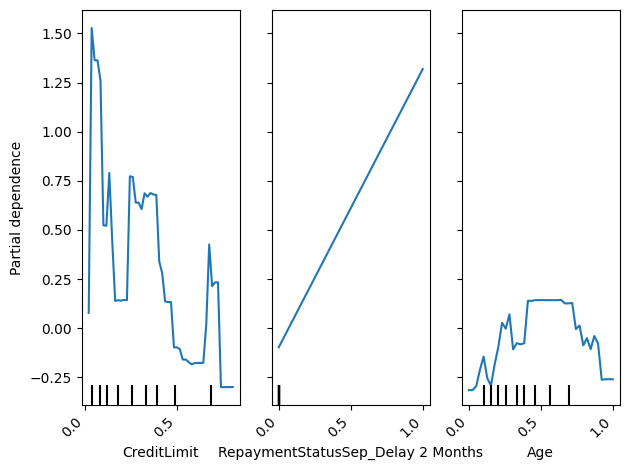

In [78]:
from sklearn.inspection import PartialDependenceDisplay

# Generar PDPs para las principales características
important_features = importance_df['Feature'].head(3)  # Seleccionar las 3 características más importantes
pdp_display = PartialDependenceDisplay.from_estimator(
    boosting_model, df_train, features=important_features, grid_resolution=50
)

# Ajustar etiquetas del eje x para evitar solapamiento
for ax in pdp_display.axes_.flatten():  # Iterar sobre los subgráficos
    plt.sca(ax)  # Fijar el subgráfico actual
    plt.xticks(rotation=45, ha='right')  # Rotar etiquetas 45° hacia la derecha

plt.tight_layout()  # Ajustar espacios entre los gráficos
plt.show()



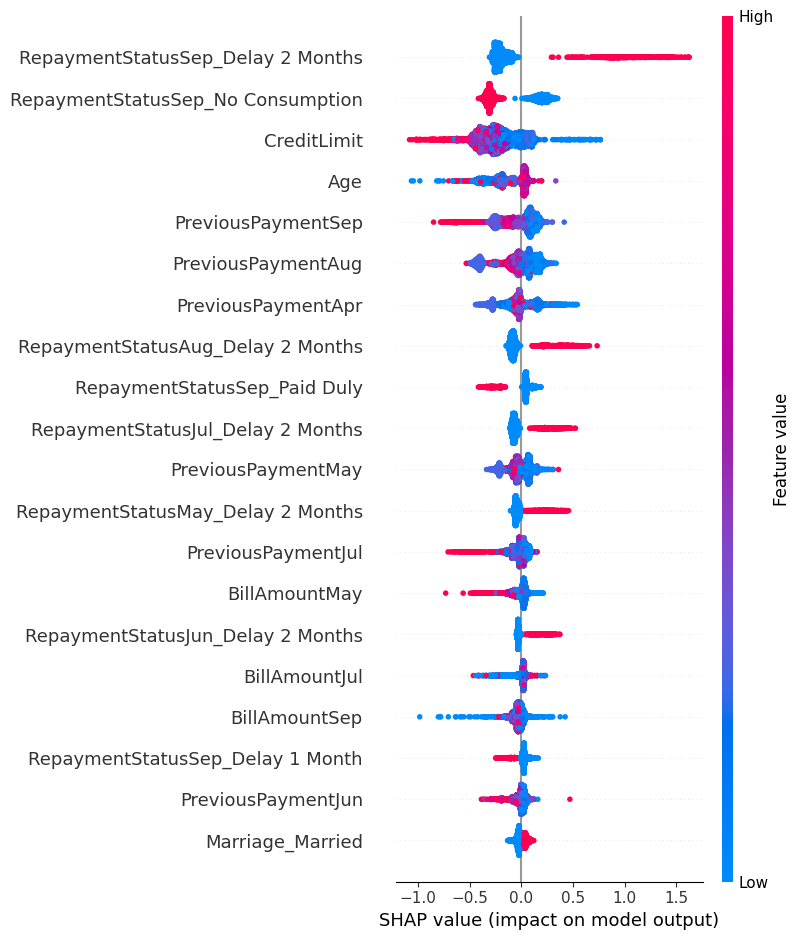

In [72]:
import shap
# Usar TreeExplainer directamente
explainer = shap.TreeExplainer(boosting_model)

# Calculamos los valores SHAP para el conjunto de validación
shap_values = explainer.shap_values(X_val)

shap_values = np.array([[col for col in elem] for elem in shap_values])

# Resumen de los valores SHAP (gráfico resumen)
shap.summary_plot(shap_values, pd.DataFrame(X_val,columns=X.columns))

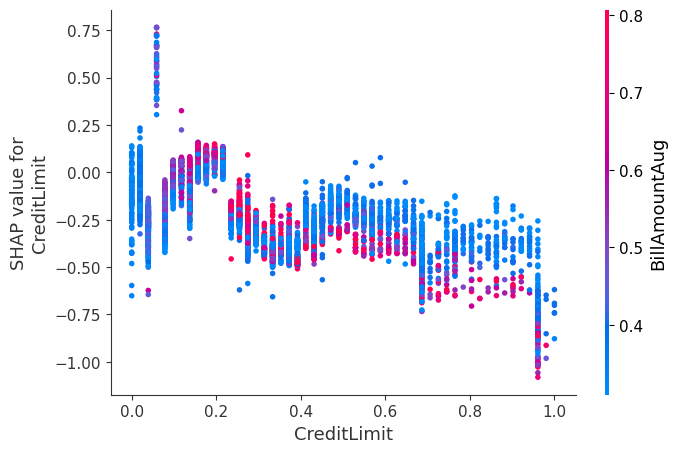

In [73]:
# Gráfico de dispersión para un ejemplo específico
shap.initjs()  # Para inicializar visualizaciones interactivas

# Seleccionamos un ejemplo (puedes cambiar el índice)
example_index = 0
shap.force_plot(explainer.expected_value, shap_values[example_index], X_val[example_index])

# Gráfico de dependencia para una característica
shap.dependence_plot("CreditLimit", shap_values, pd.DataFrame(X_val,columns=X.columns))  # Ajusta el nombre de la característica